# Lab 4: Simulation Experiments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics

np.random.seed(42)

## Create and Plot Normal Distribution

In [2]:
mean = 0
std_dev = 1

normal_distribution = stats.norm(mean, std_dev)

Text(0, 0.5, 'Probability Density')

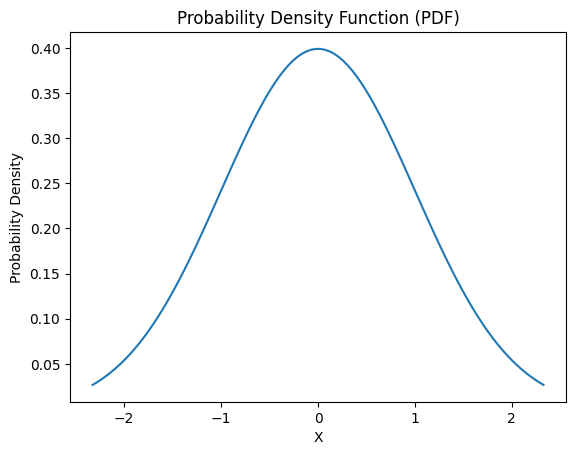

In [3]:
x_range = np.linspace(normal_distribution.ppf(0.01),
                      normal_distribution.ppf(0.99), 100)
plt.plot(x_range, normal_distribution.pdf(x_range))
plt.title('Probability Density Function (PDF)')
plt.xlabel('X')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Cumulative Probability')

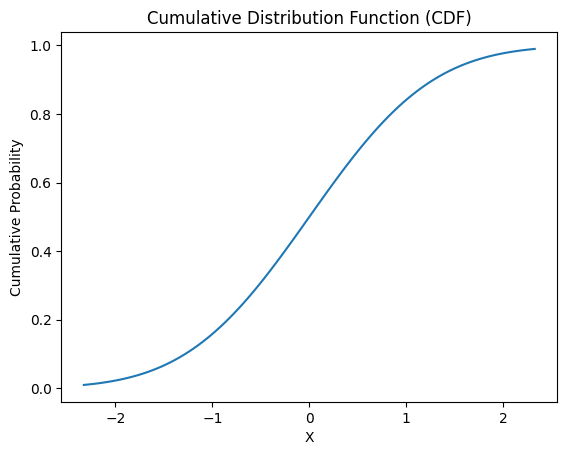

In [4]:
plt.plot(x_range, normal_distribution.cdf(x_range))
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')

Text(0, 0.5, 'Probability Density')

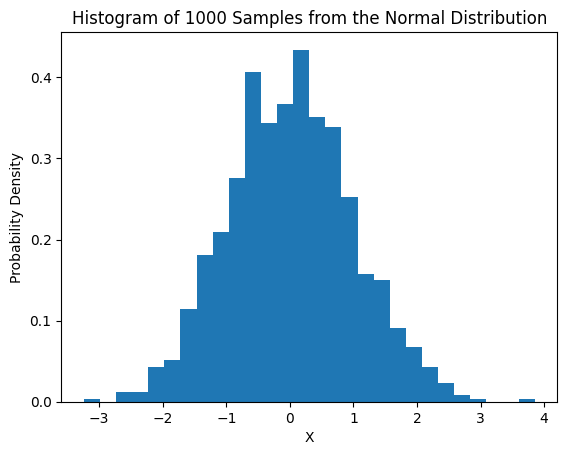

In [5]:
samples = normal_distribution.rvs(size=1000)
# samples
plt.hist(samples, bins = "auto", density=True)
plt.title('Histogram of 1000 Samples from the Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')

In [6]:
print(samples.mean(), samples.std())

0.01933205582232549 0.9787262077473543


## Method for Sampling

In [7]:
def pull_samples(distribution, n):
    # return distribution.ppf(np.random.rand(n))
    return distribution.rvs(size=n)

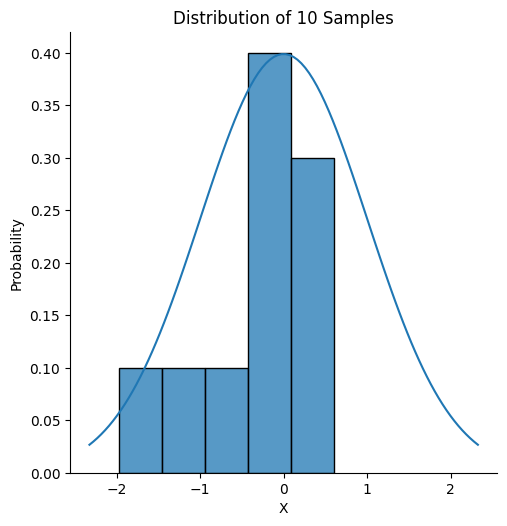

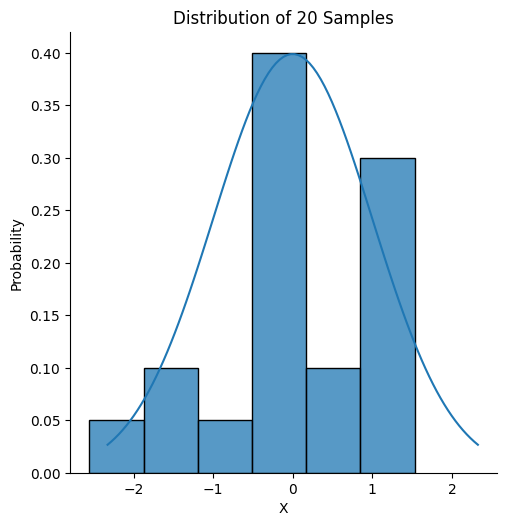

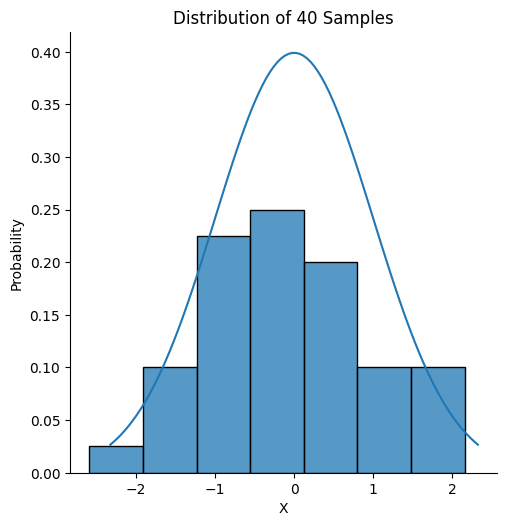

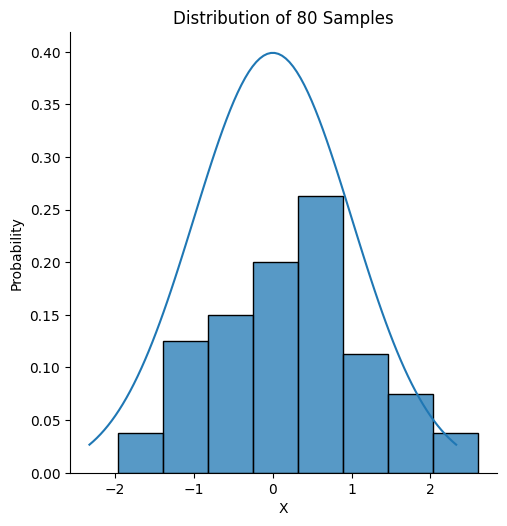

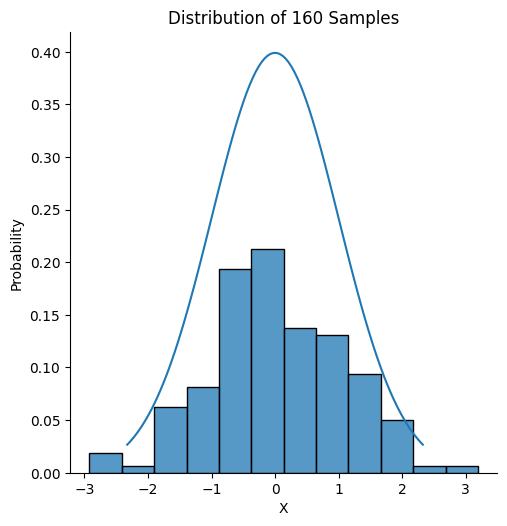

In [10]:
sample_sizes = [10, 20, 40, 80, 160]
for size in sample_sizes:
    distribution = pull_samples(normal_distribution, size)
    sns.displot()
    plt.plot(x_range, normal_distribution.pdf(x_range))
    sns.histplot(distribution, stat="probability")
    title = "Distribution of " + str(size) + " Samples"
    plt.title(title)
    plt.xlabel('X')


## Type I Errors

In [ ]:
group1 = pull_samples(normal_distribution, 25)
group2 = pull_samples(normal_distribution, 25)
est_effect_size = abs(group1.mean() - group2.mean())
print("The estimated effect size between group1 and group2 is ", est_effect_size)

The estimated effect size between group1 and group2 is  0.042826736500889334


In [ ]:
def compare_distrib(dist1, dist2, n1, n2, k):
    est_effect_size = []
    g1 = []
    g2 = []
    for i in range(k):
        sample1 = pull_samples(dist1, n1)
        sample2 = pull_samples(dist2, n2)
        est_effect_size.append(abs(sample1.mean() - sample2.mean()))
        g1.append(sample1)
        g2.append(sample2)
    return est_effect_size, g1, g2

Text(0.5, 0, 'Effect Size')

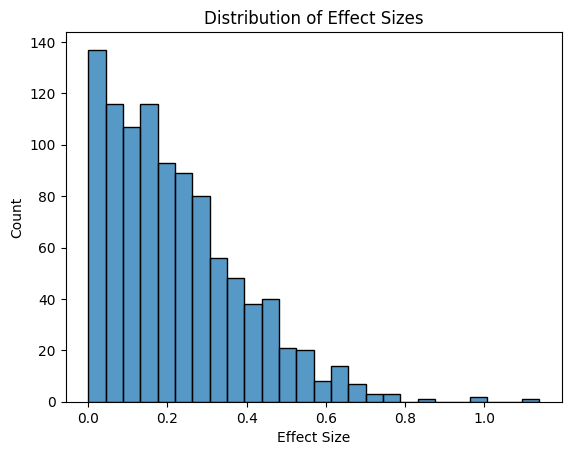

In [ ]:
sec3part4, s3p4d1, s3p4d2 = compare_distrib(normal_distribution, normal_distribution, 25, 25, 1000)
sns.histplot(sec3part4)
title = "Distribution of Effect Sizes"
plt.title(title)
plt.xlabel('Effect Size')

1.1380075669079384


Text(0.5, 1.0, 'Distribution 2')

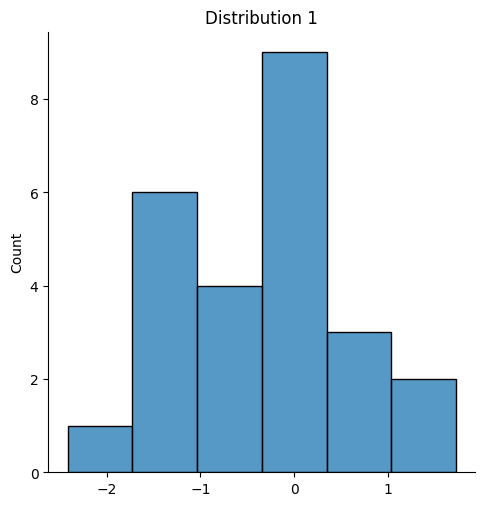

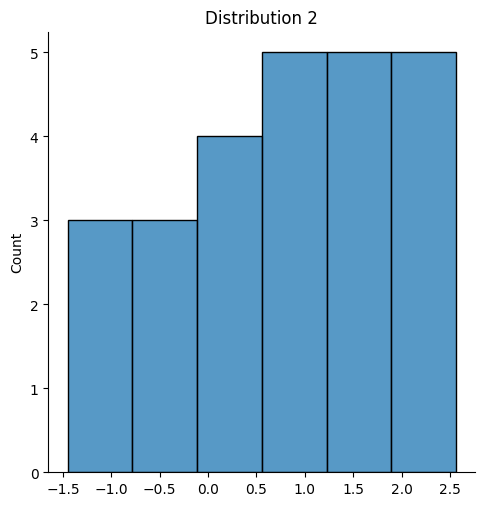

In [ ]:
eff_max = max(sec3part4)
print(eff_max)
ind = sec3part4.index(eff_max)

sns.displot()
sns.histplot(s3p4d1[ind])
title = "Distribution 1"
plt.title(title)
sns.displot()
sns.histplot(s3p4d2[ind])
title = "Distribution 2"
plt.title(title)

## Type II Errors

In [ ]:
mean = 1
std_dev = 1
new_distribution = stats.norm(mean, std_dev)

Text(0.5, 0, 'Effect Size')

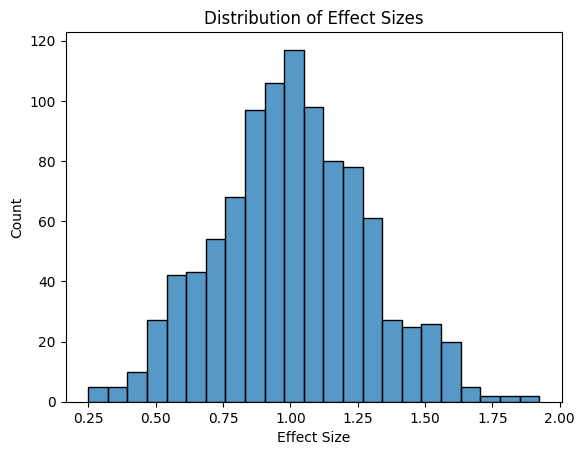

In [ ]:
sec4part2, s4p2d1, s4p2d2 = compare_distrib(normal_distribution, new_distribution, 25, 25, 1000)
sns.histplot(sec4part2)
title = "Distribution of Effect Sizes"
plt.title(title)
plt.xlabel('Effect Size')

0.24969225561462072


Text(0.5, 1.0, 'Distribution 2')

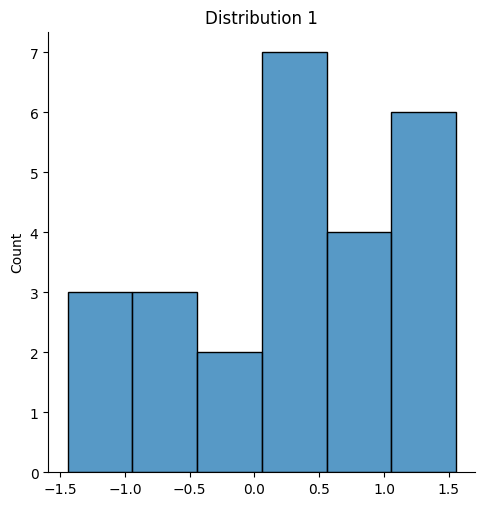

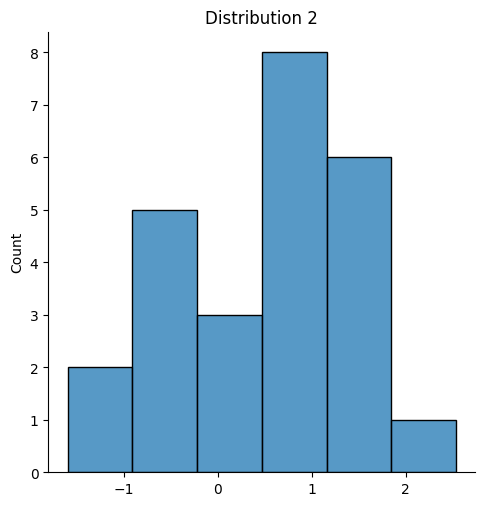

In [ ]:
eff_min = min(sec4part2)
print(eff_min)
ind = sec4part2.index(eff_min)

sns.displot()
sns.histplot(s4p2d1[ind])
title = "Distribution 1"
plt.title(title)
sns.displot()
sns.histplot(s4p2d2[ind])
title = "Distribution 2"
plt.title(title)

## Bootstrapping

In [ ]:
boot_data = pd.read_csv("some_data.csv")

In [ ]:
def boot_set(ser):
    boot = []
    for i in range(500):
        # boot.append(ser.sample(replace=True))
        boot.append(np.random.choice(ser))
    return boot

def bootstrap(ser):
    set = []
    for j in range(1000):
        boot = boot_set(ser)
        set.append(statistics.median(boot))
    set.sort()
    return set

In [ ]:
var_1 = bootstrap(boot_data["variable_1"])
bound1 = var_1[24]
bound2 = var_1[974]
print(bound1, bound2)

-0.0380225684888086 0.11123135411969434


In [ ]:
var_2 = bootstrap(boot_data["variable_2"])
bound1 = var_2[24]
bound2 = var_2[974]
print(bound1, bound2)


0.7081266032369634 0.9033714859009618


In [ ]:
var_3 = bootstrap(boot_data["variable_3"])
bound1 = var_3[24]
bound2 = var_3[974]
print(bound1, bound2)

0.8455116880949616 1.0682067267448354
